In this assignment, the goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) and chk which model helps predict if a term deposit campain will be subscribed too

## Input variables:
##### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 
'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student', 'technician', 'unemployed','unknown')                                                                              3 - marital : marital status (categorical: 
'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
dfBankData = pd.read_csv("Data/bank-full.csv")
dfBankData.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [3]:
columns = dfBankData.columns.tolist()
columns

['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']

In [4]:
# rename columns header
dfBankData.columns = ['Bank Data']
dfBankData.head()

,Bank Data
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [5]:
#Split the data into individual features 
dfBankData[['age', 'job', 'marital','education','default','balance','housing',
            'loan','contact','day','month','duration','campaign','pdays','previous',
            'poutcome','y']] = dfBankData['Bank Data'].str.split(';', expand=True)
dfBankData.head()

,Bank Data,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506...",47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n...",33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [6]:
# drop the original column from the data set
dfBankData=dfBankData.drop(columns=['Bank Data']) 
dfBankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [7]:
# remove /" from the data set
dfBankData['job'] = dfBankData['job'].str.replace('\"', '', regex=True)
dfBankData['marital'] = dfBankData['marital'].str.replace('\"', '', regex=True)
dfBankData['education'] = dfBankData['education'].str.replace('\"', '', regex=True)
dfBankData['default'] = dfBankData['default'].str.replace('\"', '', regex=True)
dfBankData['housing'] = dfBankData['housing'].str.replace('\"', '', regex=True)
dfBankData['loan'] = dfBankData['loan'].str.replace('\"', '', regex=True)
dfBankData['contact'] = dfBankData['contact'].str.replace('\"', '', regex=True)
dfBankData['month'] = dfBankData['month'].str.replace('\"', '', regex=True)
dfBankData['poutcome'] = dfBankData['poutcome'].str.replace('\"', '', regex=True)
dfBankData['y'] = dfBankData['y'].str.replace('\"', '', regex=True)
dfBankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [9]:
# Based on the data description provided Convert the data type of non categorical features  
dfBankData = dfBankData.astype({"age":"int","balance":"int","day":"int","duration":"int",
                                "campaign":"int","pdays":"int","previous":"int"})
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
dfBankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Examine the data

In [11]:
dfBankData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

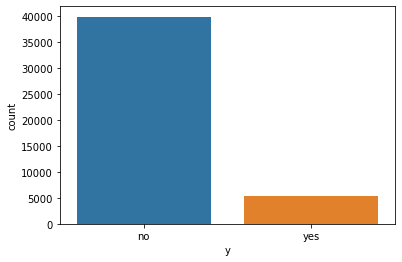

In [12]:
# Check the how many have subscribed based on the data set
sns.countplot(x='y', data=dfBankData, label='Count')

<AxesSubplot:xlabel='default', ylabel='count'>

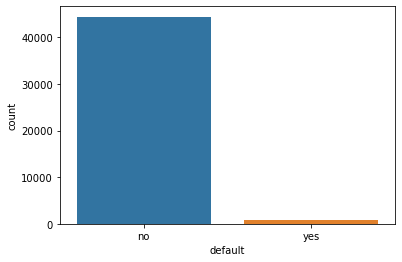

In [13]:
# check how many have credit in defaultsed
sns.countplot(x='default', data=dfBankData, label='Count')

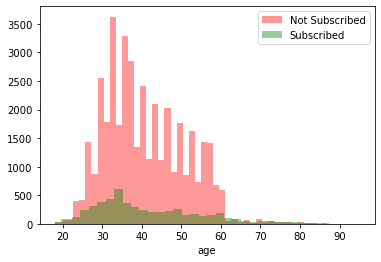

In [15]:
#Since the no subscribed count is very high (close to 80%) lets what is the distribution of 
# subscribed Vs that across other features 
# Age 

bins = range(0, 100, 10)
ax = sns.distplot(dfBankData.age[dfBankData.y=='no'],
                  color='red', 
                  kde=False, 
                  label='Not Subscribed')
sns.distplot(dfBankData.age[dfBankData.y=='yes'],
             ax=ax, 
             color='green', 
             kde=False, 
             label="Subscribed")
plt.legend()
plt.show()

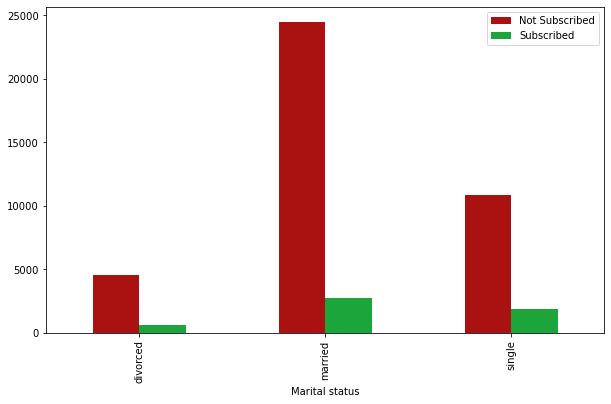

In [16]:
# Marrital status
pd.crosstab(dfBankData.marital,dfBankData.y).plot(kind="bar",figsize=(10,6),color=['#AA1111','#1CA53B'])
plt.xlabel('Marital status')
plt.legend(["Not Subscribed", "Subscribed"])
plt.show()

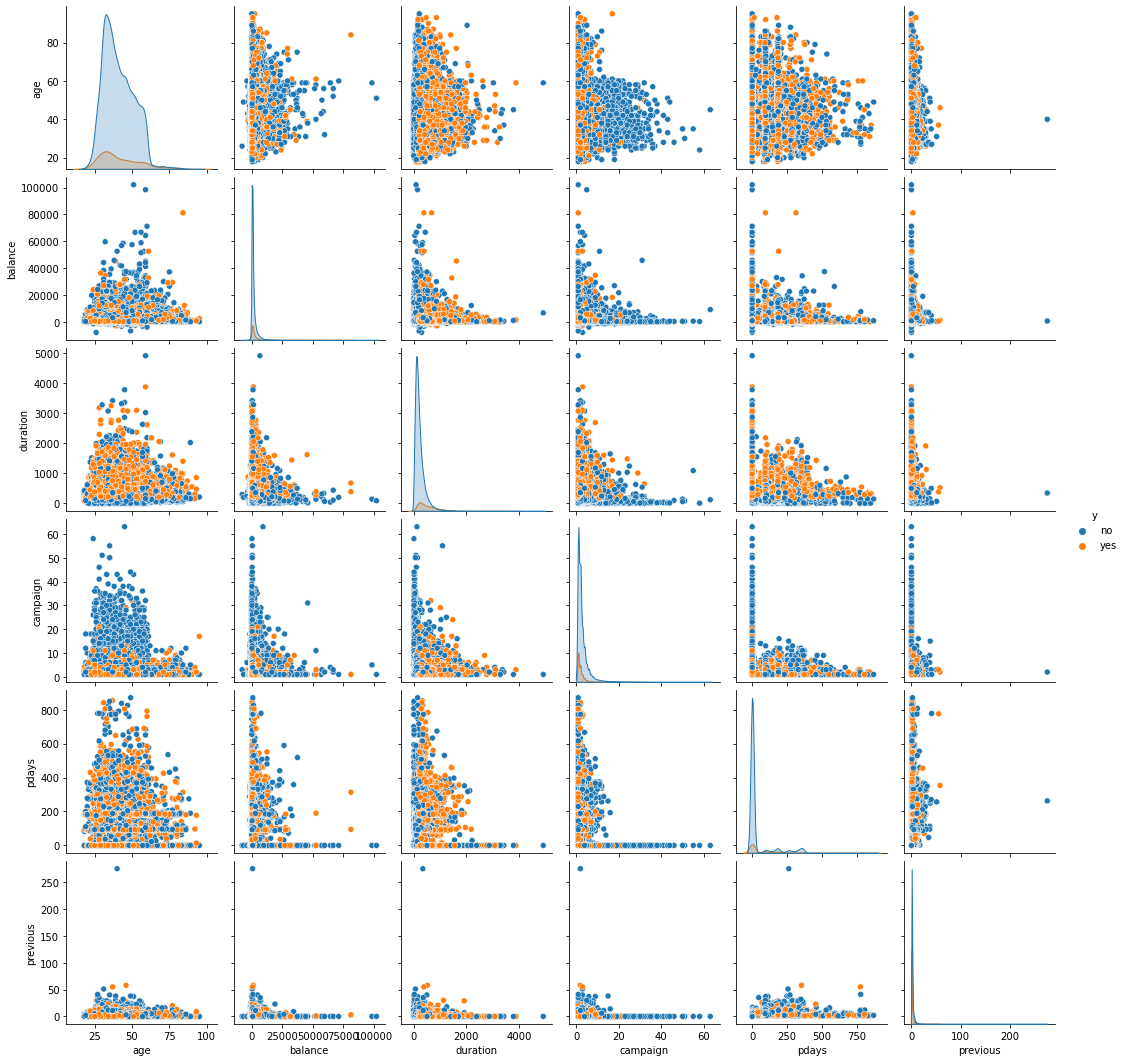

In [17]:
sns.pairplot(data=dfBankData, hue='y', vars= ['age', 'balance', 'duration','campaign','pdays','previous'])

## Few observations on the data
1. Thought there were lot of contects with age group less than 60 the subscription rate did not increase
2. The averaege yearly balance is ~ 20000 across all age groups
3. The concentration has been with cutomers with average yearly balance less than 25000
4. The duration of the conversation was short for a decision not to subscribe. Customers took quick decisions
5. Prior to this campain the customers were contacted less than 50 times on a average

<AxesSubplot:>

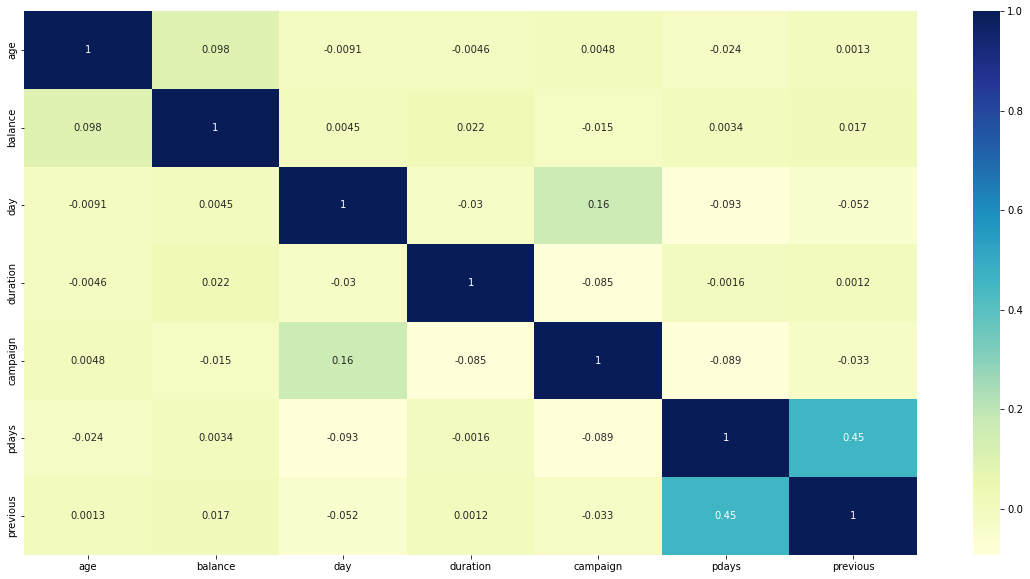

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dfBankData.corr(), annot=True, cmap='YlGnBu')

In [19]:
# age and balance have the best correlation

# Prepare Training and Test data set 


In [20]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
#Define X and y
#Define X and y
X = dfBankData.drop(['job','marital', 'education','housing', 'loan', 'contact',
                     'day', 'month', 'poutcome','y'], axis=1)
y = dfBankData['y']

In [22]:
# Get Dummies
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [23]:
print(X.columns)
print(y.columns)

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default_no', 'default_yes'],
      dtype='object')
Index(['no', 'yes'], dtype='object')


In [24]:
# Avoid dummy trap. 
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})

y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

In [25]:
print(X.columns)
print(y.columns)

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default'],
      dtype='object')
Index(['y'], dtype='object')


In [26]:
# split the data to Training and test set
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


In [28]:
# We know that the data is highly biased towards no subscription to we need to balance the training set
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [29]:
No_value = y_train[y_train.values == 1].index
Yes_value = y_train[y_train.values == 0].index

if len(No_value) > len(Yes_value):
    No_count = No_value
    Yes_count  = Yes_value
else:
    No_count = No_value
    Yes_count  = Yes_value

np.random.seed(0)
No_count = np.random.choice(No_count, size=len(Yes_count))
Yes_count = np.asarray(Yes_count)
new_indexes = np.concatenate((Yes_count, No_count))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [30]:
y_train['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

In [31]:
#Normalizing the data 
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

# restore the feature name
X_train_sc.columns = X_train.columns.values
X_test_sc.columns = X_test.columns.values

# restore the row index
X_train_sc.index = X_train.index.values
X_test_sc.index = X_test.index.values

X_train = X_train_sc
X_test = X_test_sc

## Build and Compare models

##### Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [34]:
classifier = LogisticRegression(random_state = 0) #, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_prediction = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1_score = f1_score(y_test, y_prediction)

results = pd.DataFrame([['Logistic Regression (Lasso)', accuracy, precision, recall, f1_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

##### K-Nearest Neghbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors=15) #, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)


# Predicting Test Set
y_prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1_score = (2 * (precision * recall) / (precision + recall)) 

# Note # I was getting a float64 error while using f1_score(), could not resolve it hence using the formula
 
model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)',accuracy, precision, recall, round(f1_score,6)]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

##### Support Ventor machines

In [37]:
from sklearn.svm import SVC

In [38]:
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1_score = (2 * (precision * recall) / (precision + recall))

model_results = pd.DataFrame([['SVM (Linear)', accuracy, precision, recall,round(f1_score,6)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [39]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1_score = (2 * (precision * recall) / (precision + recall))

model_results = pd.DataFrame([['SVM (RBF)', accuracy, precision, recall, round(f1_score,6)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

##### Decision Tree

In [40]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1_score = (2 * (precision * recall) / (precision + recall))

model_results = pd.DataFrame([['Decision Tree', accuracy, precision, recall, round(f1_score,6)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

##### Naive Bayes

In [42]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [43]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_prediction = classifier.predict(X_test)
acc = accuracy_score(y_test, y_prediction)
prec = precision_score(y_test, y_prediction)
rec = recall_score(y_test, y_prediction)
f1_score = (2 * (precision * recall) / (precision + recall))

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', accuracy, precision, recall, round(f1_score,6)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

# Results

In [44]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.797302,0.953153,0.810269,0.875922
1,K-Nearest Neighbors (minkowski),0.780936,0.964418,0.780714,0.862897
2,SVM (Linear),0.800619,0.951901,0.815404,0.878381
3,SVM (RBF),0.786686,0.965846,0.786224,0.866828
4,Decision Tree,0.720115,0.952089,0.719224,0.819434
5,Naive Bayes (Gaussian),0.720115,0.952089,0.719224,0.819434


#### Based on the above results The SVM (Linear) is the most powerful method for our model as shown

# K-fold Validation

In [45]:
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train)
print(classifier)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
accuracies.mean()
accuracies.std()

SVC(kernel='linear', probability=True, random_state=0)


0.014686973749665646

In [46]:
print("SVM (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM (Linear) Accuracy: 0.749 (+/- 0.029)


Test Data Accuracy: 0.7817


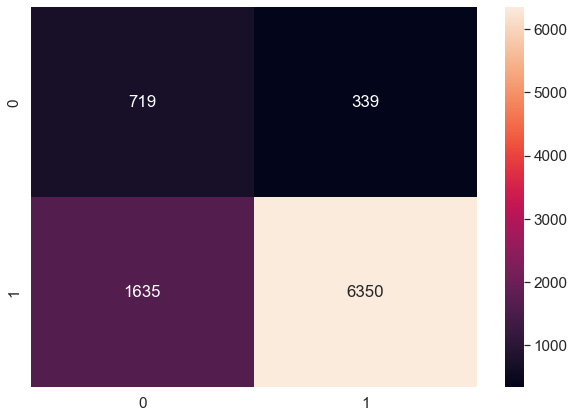

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_prediction) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction)) 

In [49]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.085568
1,balance,-0.086536
2,duration,-1.514462
3,campaign,0.206876
4,pdays,-0.162552
5,previous,-0.450181
6,default,0.035061


# Feature Selection

In [50]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [51]:
# Model to Test
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)

# Select Best X Features
rfe = RFE(classifier, n_features_to_select=None)
rfe = rfe.fit(X_train, y_train)

In [52]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True False]
[4 3 1 1 2 1 5]


In [53]:
X_train.columns[rfe.support_]

Index(['duration', 'campaign', 'previous'], dtype='object')

<AxesSubplot:>

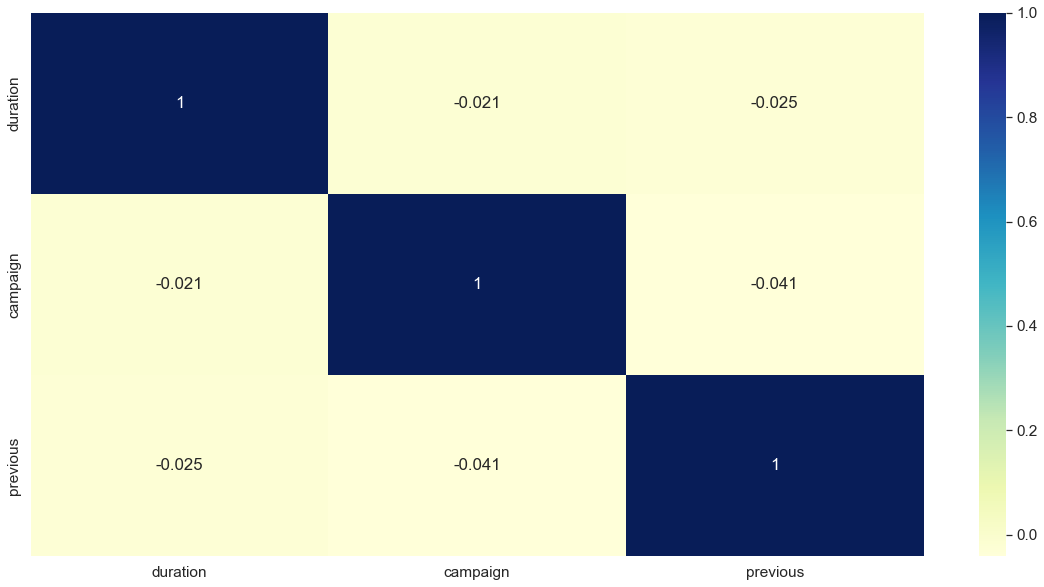

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(data=X_train[X_train.columns[rfe.support_]].corr(), annot=True, cmap='YlGnBu')

In [55]:
# Fitting Model to the Training Set
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_predinction = classifier.predict(X_test[X_train.columns[rfe.support_]])
accuracy = accuracy_score(y_test, y_predinction)
precision = precision_score(y_test, y_predinction)
recall = recall_score(y_test, y_predinction)
f1_score = (2 * (precision * recall) / (precision + recall)) 

model_results = pd.DataFrame([['SVM RFE (Linear)', accuracy, precision, recall, round(f1_score,6)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True) 

In [56]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.797302,0.953153,0.810269,0.875922
1,K-Nearest Neighbors (minkowski),0.780936,0.964418,0.780714,0.862897
2,SVM (Linear),0.800619,0.951901,0.815404,0.878381
3,SVM (RBF),0.786686,0.965846,0.786224,0.866828
4,Decision Tree,0.720115,0.952089,0.719224,0.819434
5,Naive Bayes (Gaussian),0.720115,0.952089,0.719224,0.819434
6,SVM RFE (Linear),0.806480,0.950701,0.823544,0.882566


In [57]:
# Evaluating Results
#Making the confusion matrix
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

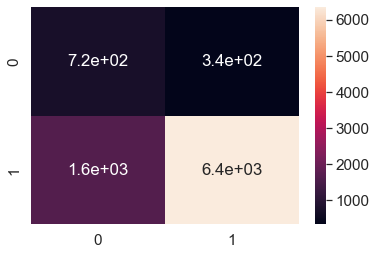

In [58]:
cm = confusion_matrix(y_test,y_prediction)
sns.heatmap(data=cm, annot=True)

In [59]:
#Making the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.31      0.68      0.42      1058
           1       0.95      0.80      0.87      7985

    accuracy                           0.78      9043
   macro avg       0.63      0.74      0.64      9043
weighted avg       0.87      0.78      0.81      9043



In [61]:
# Applying k-Fold Cross Validation (RFE)
classifier

SVC(kernel='linear', probability=True, random_state=0)

In [62]:
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)

In [63]:
print("SVM RFE (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM RFE (Linear) Accuracy: 0.746 (+/- 0.034)


In [64]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1) 

,features,coef
0,duration,-1.530208
1,campaign,0.209602
2,previous,-0.584574


In [65]:
# Formatting Final Results
final_results = y_test
final_results['predicted'] = y_prediction
final_results = final_results[['y', 'predicted']].reset_index(drop=True)

In [66]:
final_results.head()

,y,predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1


<AxesSubplot:xlabel='y', ylabel='count'>

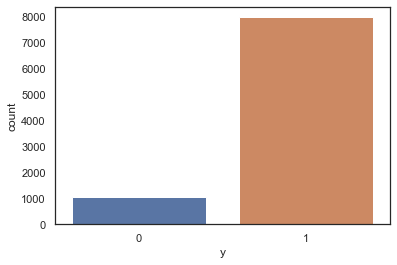

In [71]:
# Check the how many have subscribed based on the data set
sns.countplot(x='y', data=final_results, label='Count')

# Conclusion

##### 
As observed, the Bank Marketing Dataset is unbalanced and hence our models are not peerforming well. We ended unwilling ness of customers to subscribe. We need more balanced data for the modesl to be able to help identify which features can influence the customer to subscribe to the campaign